In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Import dataset
dataset = pd.read_csv('IceCreamData.csv')

In [8]:
# Melihat isi dataset
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [9]:
X = dataset['Temperature'].values
y = dataset['Revenue'].values

# Standarisasi Fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Membagi Data menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Membuat dan Melatih Model SVM
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluasi Model
train_score = svm_model.score(X_train, y_train)
test_score = svm_model.score(X_test, y_test)

#Print Evaluasi Model
print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 0.9802241041014482
Testing Score: 0.9768911907147494


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


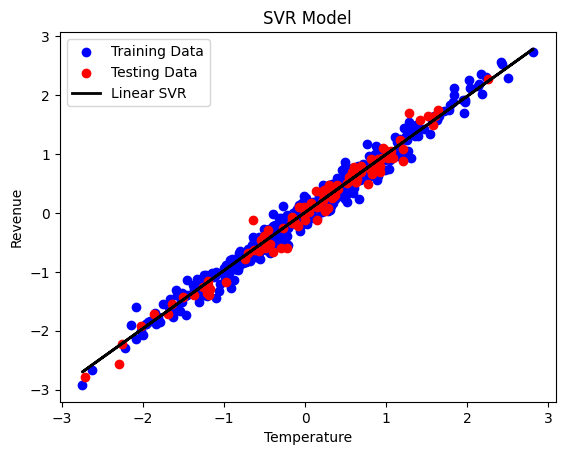

In [10]:
# Visualisasi Data & Garis Regresi
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_scaled, svm_model.predict(X_scaled), color='black', linewidth=2, label='Linear SVR')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('SVR Model')
plt.legend()
plt.show()